In [1]:
# 每行代表一个用户，各字段之间由逗号分隔，
# 顺序依次为：“userID，age，gender，education，marriageStatus，haveBaby，hometown，residence”。
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import pandas as pd

path = '~/codedata/tpai/pre/'
trainfile = 'train.csv'
train = pd.read_csv(path + trainfile)
user = pd.read_csv(path + 'user.csv')

In [2]:
train = pd.merge(train, user, on = 'userID', how='left')

In [3]:
train.head()

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator,age,gender,education,marriageStatus,haveBaby,hometown,residence
0,0,170000,NaN,3089,2798058,293,1,1,25,2,1,3,1,0,1301
1,0,170000,NaN,1259,463234,6161,1,2,20,2,1,1,0,0,213
2,0,170000,NaN,4465,1857485,7434,4,1,16,1,1,0,0,0,1502
3,0,170000,NaN,1004,2038823,977,1,1,0,0,0,0,0,0,1001
4,0,170000,NaN,1887,2015141,3688,1,1,35,1,2,2,0,1001,1001


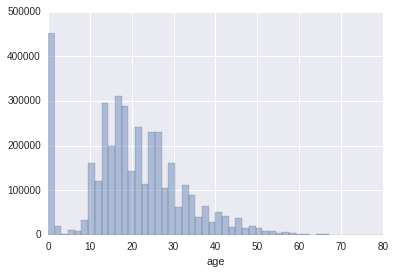

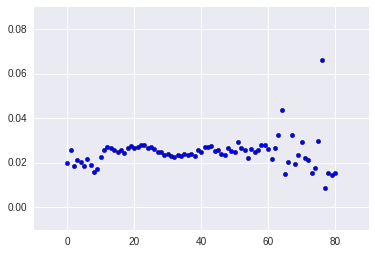

In [4]:
# age
la = 'label'
var = 'age'
sns.distplot(train[var],kde=False)
fig = plt.figure()
means = train.groupby(var)['label'].mean()
plt.scatter(x=means.index,y=means.values)

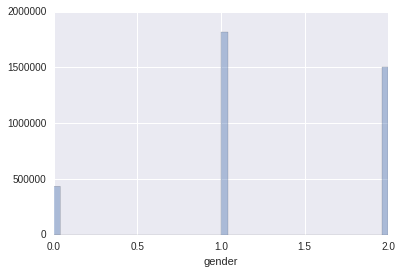

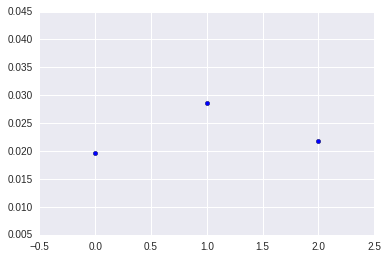

In [5]:
var = 'gender'
sns.distplot(train[var],kde=False)
fig = plt.figure()
means = train.groupby(var)['label'].mean()
plt.scatter(x=means.index,y=means.values)

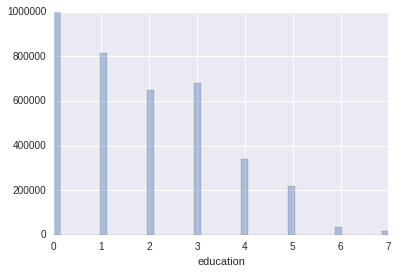

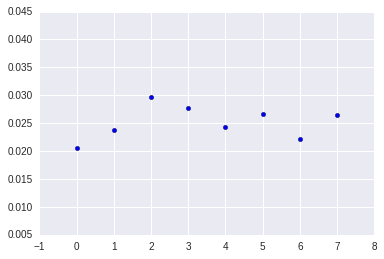

In [6]:
var = 'education'
sns.distplot(train[var],kde=False)
fig = plt.figure()
means = train.groupby(var)['label'].mean()
plt.scatter(x=means.index,y=means.values)

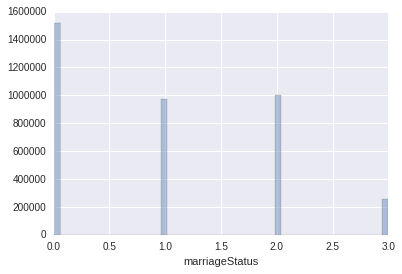

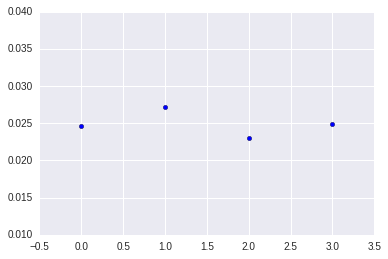

In [7]:
# 用户当前感情状况，取值包括单身，新婚，已婚，未知。
var = 'marriageStatus'
sns.distplot(train[var],kde=False)
fig = plt.figure()
means = train.groupby(var)['label'].mean()
plt.scatter(x=means.index,y=means.values)

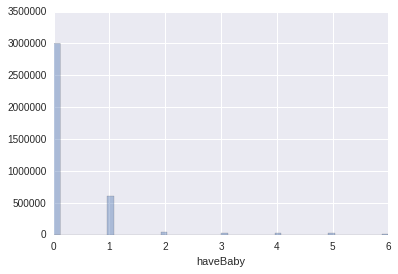

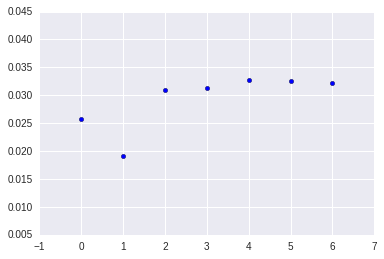

In [8]:
# 用户当前孕育宝宝状态，取值包括孕育中，宝宝0~6个月，宝宝6~12个月，宝宝1~2岁，宝宝2~3岁，育儿但宝宝年龄未知，未知。
var = 'haveBaby'
sns.distplot(train[var],kde=False)
fig = plt.figure()
means = train.groupby(var)['label'].mean()
plt.scatter(x=means.index,y=means.values)

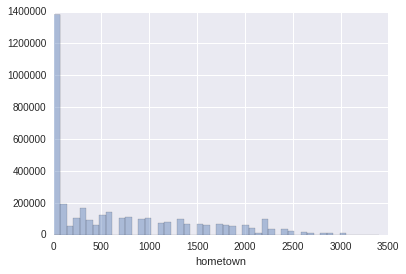

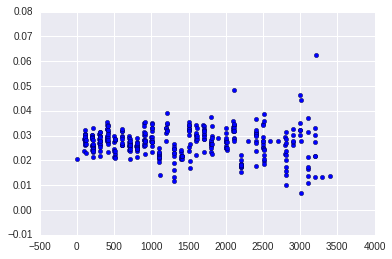

In [9]:
# 用户出生地，取值具体到市级城市，使用二级编码，千位百位数表示省份，十位个位数表示省内城市，
# 如1806表示省份编号为18，城市编号是省内的6号，编号0表示未知。
var = 'hometown'
sns.distplot(train[var],kde=False)
fig = plt.figure()
means = train.groupby(var)['label'].mean()
plt.scatter(x=means.index,y=means.values)

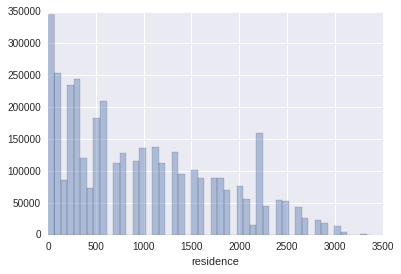

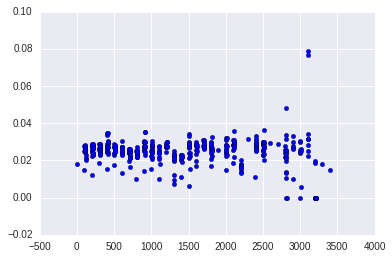

In [10]:
# 最近一段时间用户长期居住的地方，取值具体到市级城市，编码方式与家乡相同。
var = 'residence'
sns.distplot(train[var],kde=False)
fig = plt.figure()
means = train.groupby(var)['label'].mean()
plt.scatter(x=means.index,y=means.values)

,label,age,gender,education,marriageStatus,haveBaby,hometown,residence
label,1.000000,0.006484,-0.006067,0.012722,-0.002709,-0.000471,0.011038,0.001840
age,0.006484,1.000000,0.350603,-0.043052,0.338860,0.118483,0.167783,0.048239
gender,-0.006067,0.350603,1.000000,0.115340,0.051904,0.181682,0.147318,0.059086
education,0.012722,-0.043052,0.115340,1.000000,-0.054907,0.023421,0.093338,0.034649
marriageStatus,-0.002709,0.338860,0.051904,-0.054907,1.000000,0.009674,0.041608,0.005624
haveBaby,-0.000471,0.118483,0.181682,0.023421,0.009674,1.000000,0.045746,-0.005430
hometown,0.011038,0.167783,0.147318,0.093338,0.041608,0.045746,1.000000,0.462833
residence,0.001840,0.048239,0.059086,0.034649,0.005624,-0.005430,0.462833,1.000000


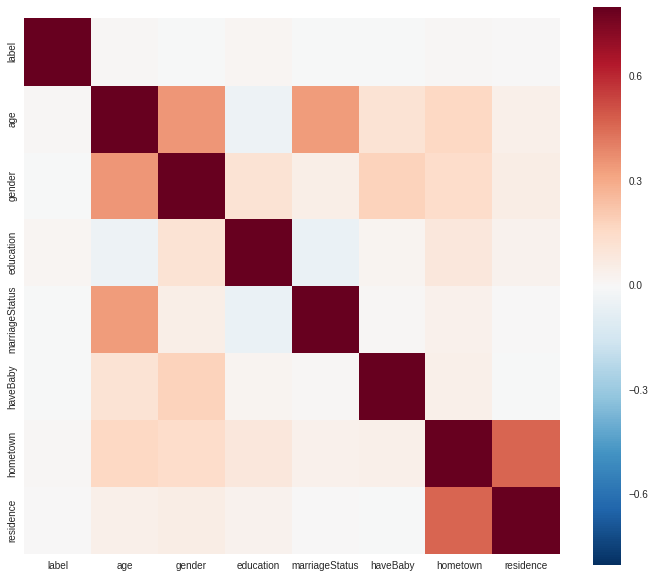

In [11]:
feats = ['label','age','gender','education','marriageStatus','haveBaby','hometown','residence']
corr = train[feats].corr()
fig = plt.figure(figsize=(12,10))
sns.heatmap(corr, vmax=.8, square=True)
corr